In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

Load wildfires data
This file contains the Estimated_fire_area that you can use as the labels to train your model with
You can use the other columns as features in your model

In [2]:
file_wildfires = "E:/Nov_10/Historical_Wildfires.csv"
wildfires_df = pd.read_csv(file_wildfires)
wildfires_df['Date'] = pd.to_datetime(wildfires_df['Date'])
wildfires_df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
wildfires_df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
dtype: object

In [4]:
wildfires_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26406.0,144.297966,314.453847,1.0,8.911875,38.434091,146.951278,10120.943170
Mean_estimated_fire_brightness,26406.0,319.662078,8.862005,290.7,313.933333,319.784412,325.403144,381.950000
Mean_estimated_fire_radiative_power,26406.0,83.621258,67.510022,0.0,44.150391,67.133333,103.123611,2178.600000
Mean_confidence,26406.0,87.574735,4.371972,76.0,85.000000,87.771429,90.498403,100.000000
Std_confidence,24199.0,7.228302,1.995221,0.0,6.687010,7.707025,8.236665,16.970563
Var_confidence,24199.0,56.229092,25.898935,0.0,44.716106,59.398234,67.842642,288.000000
Count,26406.0,72.059305,150.973128,1.0,5.000000,20.000000,74.000000,3954.000000


In [5]:
print("Number of records: {}".format(len(wildfires_df)))
print("Number of regions: {}\n".format(len(wildfires_df['Region'].unique())))
print(wildfires_df['Region'].unique())


Number of records: 26406
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


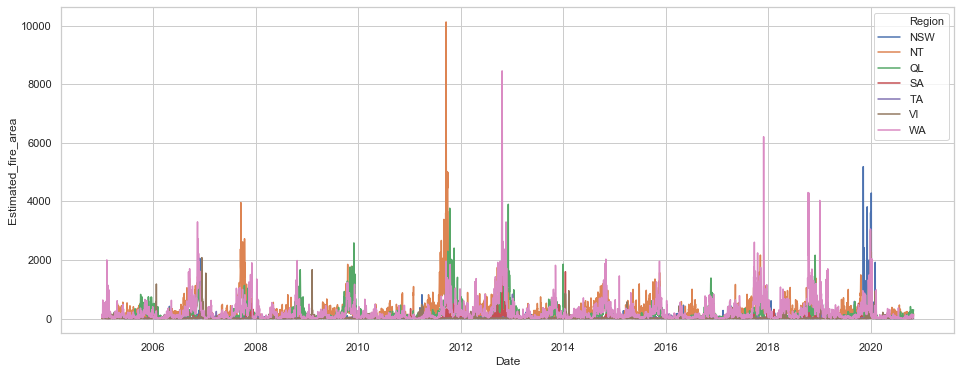

In [6]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=wildfires_df)

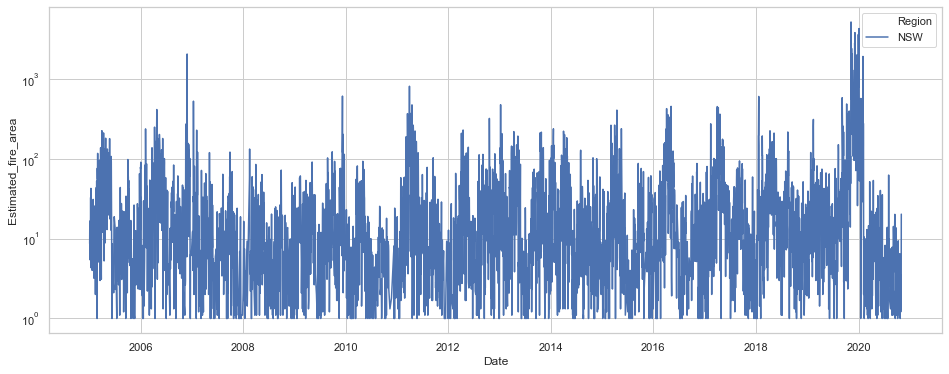

In [7]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='NSW'])
g.set_yscale("log")

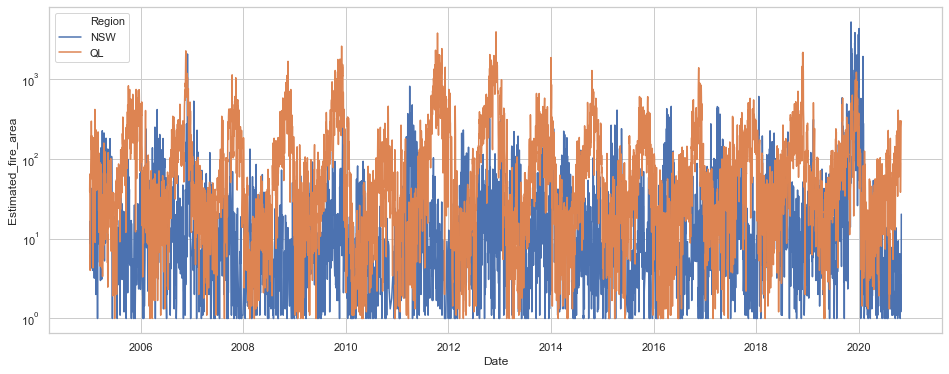

In [8]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='QL') | (wildfires_df['Region']=='NSW')])
g.set_yscale("log")

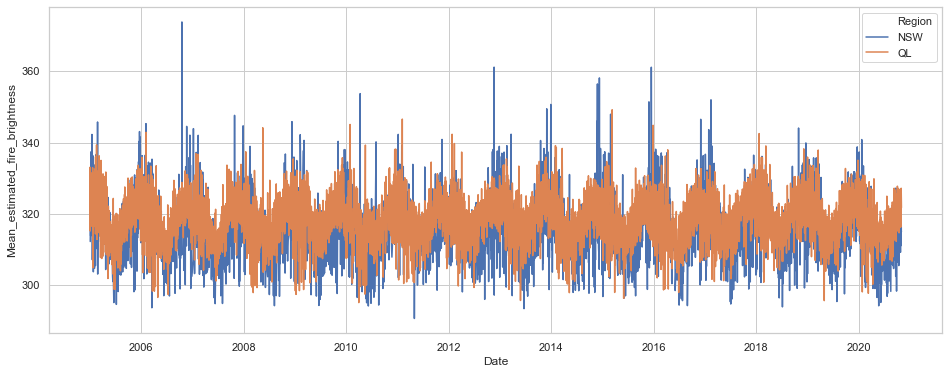

In [9]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Mean_estimated_fire_brightness",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='QL') | (wildfires_df['Region']=='NSW')])